In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
aisles = pd.read_csv(R'D:\instacart\data_files\aisles.csv')
departments = pd.read_csv(R'D:\instacart\data_files\departments.csv')
order_products_prior = pd.read_csv(R'D:\instacart\data_files\order_products__prior.csv')
order_products_train = pd.read_csv(R'D:\instacart\data_files\order_products__train.csv')
orders = pd.read_csv(R'D:\instacart\data_files\orders.csv')
products = pd.read_csv(R'D:\instacart\data_files\products.csv')

first we will perform monovariate analysis on aisles

In [4]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


aisle contains 134 differenr categories with a unique id for each category

departments have 21 different departments with unique id assigned to them

In [5]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


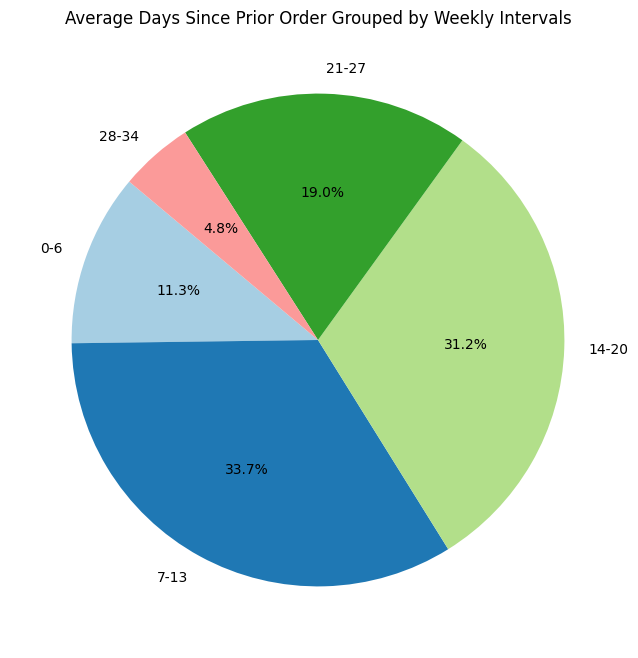

In [7]:
mean_days = orders.groupby('user_id')['days_since_prior_order'].mean()

# Step 2: Bin the data into intervals of 7 days
bins = range(0, int(mean_days.max()) + 7, 7)
labels = [f'{i}-{i+6}' for i in bins[:-1]]
mean_days_binned = pd.cut(mean_days, bins=bins, labels=labels, right=False)

# Step 3: Count the number of users in each bin
bin_counts = mean_days_binned.value_counts().sort_index()

# Step 4: Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(bin_counts, labels=bin_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Average Days Since Prior Order Grouped by Weekly Intervals')
plt.show()

this data suggests that :
Approx. 11% of the total customers are regular and order within 1 week of their previous order.

Approx. 65% of the customers order 2-3 times in a month and their frequency can be increased if offers are given to them from time to time.

Approx. 19% of the customers are 1 time users who order food once a month.

Approx. 5% of the customers are new users or users that have left the platform. 

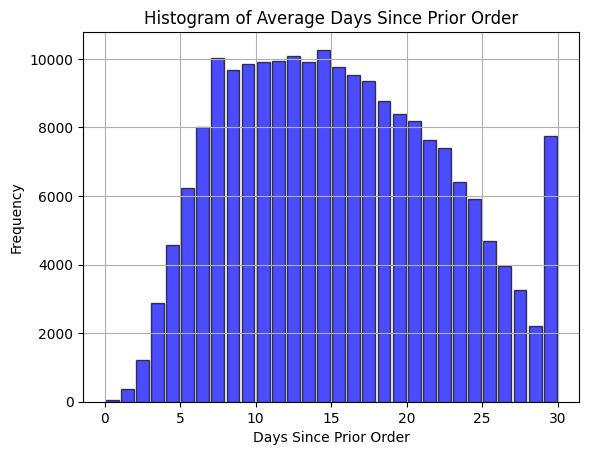

In [78]:
plt.hist(orders.groupby('user_id')['days_since_prior_order'].mean(), bins=30, color='blue', edgecolor='black', alpha=0.7, rwidth=0.85)
plt.title('Histogram of Average Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Frequency')
plt.grid()
plt.show()

Most of the people re-order within 2-3 weeks of their first order

In [8]:
conditions = [
    (orders['order_hour_of_day'] < 5) | (orders['order_hour_of_day'] > 23),
    (orders['order_hour_of_day'] >= 5) & (orders['order_hour_of_day'] < 7),
    (orders['order_hour_of_day'] >= 7) & (orders['order_hour_of_day'] < 11),
    (orders['order_hour_of_day'] >= 11) & (orders['order_hour_of_day'] < 16),
    (orders['order_hour_of_day'] >= 16) & (orders['order_hour_of_day'] < 20),
    (orders['order_hour_of_day'] >= 20) & (orders['order_hour_of_day'] <= 23)
]

labels = ['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']

# Use numpy's select function to assign the corresponding labels
orders['order_time'] = np.select(conditions, labels, default='Unknown')

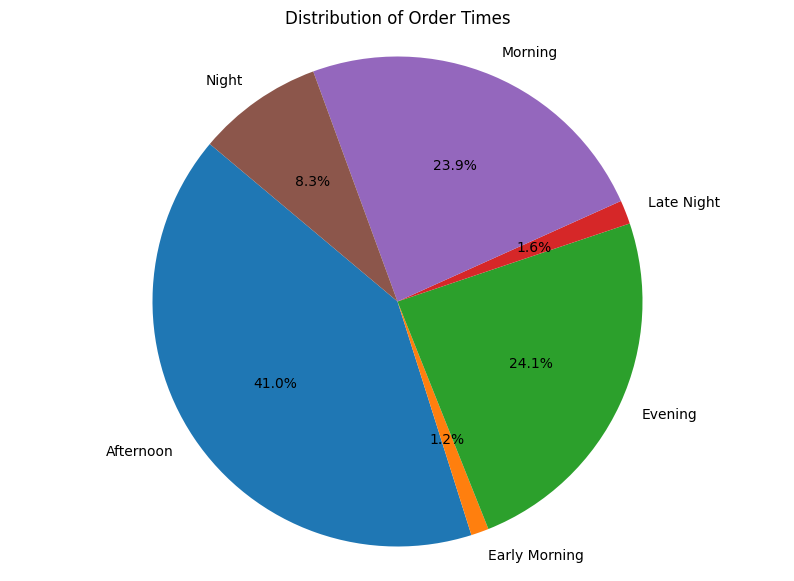

In [10]:
order_time_counts = orders['order_time'].value_counts().sort_index()

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(order_time_counts, labels=order_time_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Order Times')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

8am to 7pm is the busyest time peaking between 10am and 5pm with approx. 57% of orders placed during this time.

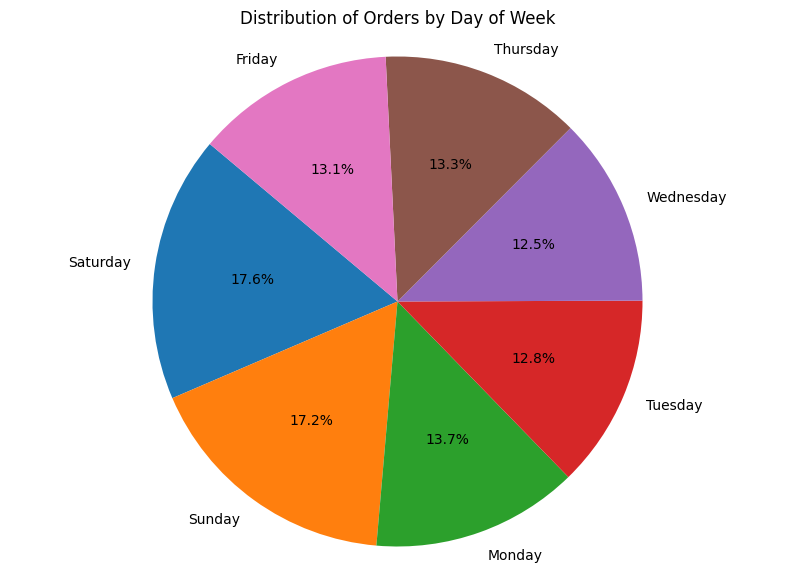

In [12]:

# Assuming 'orders' is your DataFrame and 'order_dow' is the column of interest
order_dow_counts = orders['order_dow'].value_counts().sort_index()
custom_labels = ['Saturday','Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(order_dow_counts, labels=custom_labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Orders by Day of Week')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

From the pie chart it is clear that approx. 35% of the total orders placed in a week are placed on saturday and sunday

<Axes: title={'center': 'Order Frequency by Day of Week and Time of Day'}, xlabel='order_dow'>

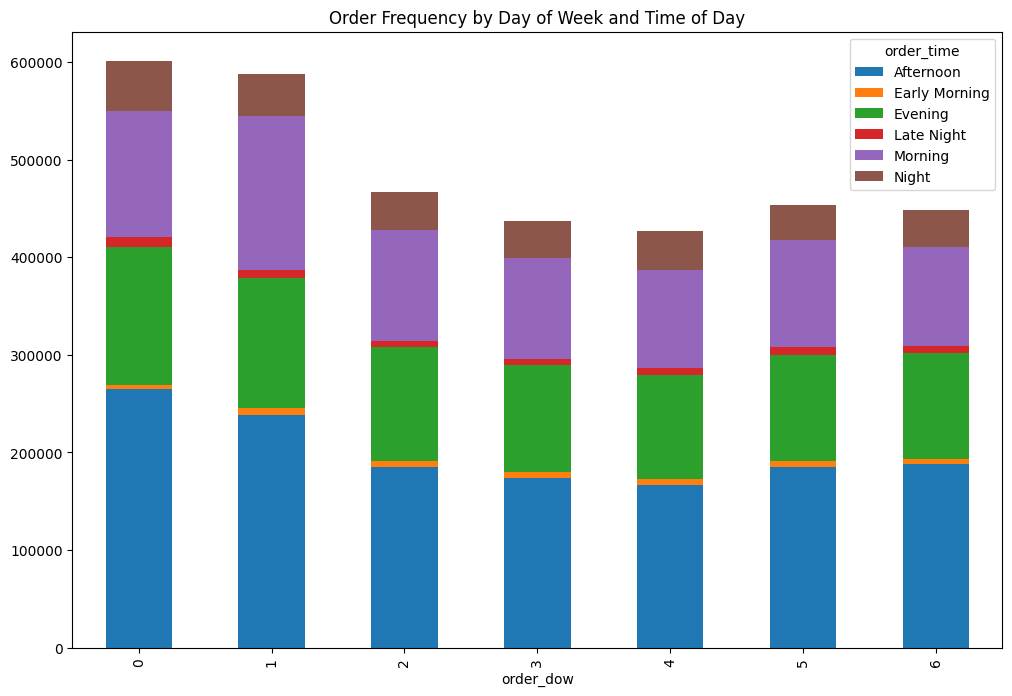

In [61]:
orders.groupby('order_dow')['order_time'].value_counts().unstack().plot(kind='bar', stacked=True, figsize=(12, 8), title='Order Frequency by Day of Week and Time of Day')

In [82]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [89]:
product_aisle = pd.merge(products, aisles, on='aisle_id', how='inner')

In [91]:
product_aisle_department = pd.merge(product_aisle, departments, on='department_id', how='inner')

In [92]:
product_aisle_department

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry
...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen
49685,49686,Artisan Baguette,112,3,bread,bakery
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets


In [97]:
product_aisle_department_product = pd.merge(product_aisle_department, order_products_prior, on='product_id', how='inner')

In [98]:
product_aisle_department_product

,product_id,product_name,aisle_id,department_id,aisle,department,order_id,add_to_cart_order,reordered
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,1107,7,0
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,5319,3,1
2,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,7540,4,1
3,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,9228,2,0
4,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,9273,30,0
...,...,...,...,...,...,...,...,...,...
32434484,49688,Fresh Foaming Cleanser,73,11,facial care,personal care,3111954,3,0
32434485,49688,Fresh Foaming Cleanser,73,11,facial care,personal care,3122003,20,0
32434486,49688,Fresh Foaming Cleanser,73,11,facial care,personal care,3166828,5,1
32434487,49688,Fresh Foaming Cleanser,73,11,facial care,personal care,3290206,10,0


In [104]:
orders_products = pd.merge(orders, product_aisle_department_product, on='order_id', how='inner')

In [106]:
orders_products.drop(['product_id', 'aisle_id', 'department_id'], axis=1, inplace=True)

In [107]:
orders_products

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_time,product_name,aisle,department,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,Morning,Soda,soft drinks,beverages,1,0
1,2539329,1,prior,1,2,8,NaN,Morning,Original Beef Jerky,popcorn jerky,snacks,3,0
2,2539329,1,prior,1,2,8,NaN,Morning,Organic Unsweetened Vanilla Almond Milk,soy lactosefree,dairy eggs,2,0
3,2539329,1,prior,1,2,8,NaN,Morning,Aged White Cheddar Popcorn,popcorn jerky,snacks,4,0
4,2539329,1,prior,1,2,8,NaN,Morning,XL Pick-A-Size Paper Towel Rolls,paper goods,household,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,2977660,206209,prior,13,1,12,7.0,Afternoon,Roasted & Salted Shelled Pistachios,nuts seeds dried fruit,snacks,9,0
32434485,2977660,206209,prior,13,1,12,7.0,Afternoon,Banana,fresh fruits,produce,1,1
32434486,2977660,206209,prior,13,1,12,7.0,Afternoon,High Protein Bar Chunky Peanut Butter,energy granola bars,snacks,7,0
32434487,2977660,206209,prior,13,1,12,7.0,Afternoon,Brownie Crunch High Protein Bar,energy granola bars,snacks,6,0


In [108]:
orders_products.to_csv(R'D:\instacart\data_files\orders_products.csv', index=False)